<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/ready/ML_implementation_stacked_dealt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Повышение уровня прокальцитонина в крови выше 1,8 нг/мл указывает на развитие инфекционных осложнений (чувствительность — 80–95%, специфичность — 88–93%).

Уровень ПКТ четко коррелирует с тяжестью воспалительного процесса:

ПКТ < 0,5 нг/мл – низкий риск тяжелого сепсиса и/или септического шока.

ПКТ от 0,5 до 2 нг/мл – умеренный синдром системного воспалительного ответа (ССВО)– "серая зона". Поставить диагноз сепсиса с уверенностью нельзя, рекомендуется повторить измерение в течение 6-24 часов.

ПКТ > 2 нг/мл – тяжелый синдром системного воспалительного ответа (ССВО), высокий риск тяжелого сепсиса и/или септического шока (чувствительность 85%, специфичность 93%).

ПКТ 10 нг/мл и выше – выраженный синдром системного воспалительного ответа (ССВО)– практически всегда вследствие тяжелого бактериального сепсиса или септического шока. Такие уровни ПКТ часто связаны со СПОН (синдром полиорганной недостаточности), и указывают на высокий риск летального исхода.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install colorama
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier
!pip install h2o
import h2o
h2o.init()
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 65.7MB 120kB/s 
     |████████████████████████████████| 164.6MB 103kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=624ac8754f229ee75f2c6424c9c0d9e9c8d081af96de3dfc21f7ea88928f6b7a
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp78ermybg
  JVM stdout: /tmp/tmp78ermybg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp78ermybg/h2o_unknownUser_started_from_python.err
 

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_pluim0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [38]:
df = pd.read_csv('/content/drive/MyDrive/test/covid_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [39]:
# разделяем набор данных на тренировочную, тестовую и валидационную части и нормализуем данные
X = df.drop('Ab_ind', axis=1)  
Y = df['Ab_ind']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, stratify = Y_train, random_state = 42)
train = X_train.copy()
test = X_test.copy()
valid = X_val.copy()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)
valid = h2o.H2OFrame(valid)
Y = h2o.H2OFrame(Y_train.reset_index())
V = h2o.H2OFrame(Y_val.reset_index())
T = h2o.H2OFrame(Y_test.reset_index())
train['target'] = Y['Ab_ind']
valid['target'] = V['Ab_ind']
test['target'] = T['Ab_ind']

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
predictors = train.col_names
predictors.remove('target')

train['target'] = train['target'].asfactor()
valid['target'] = valid['target'].asfactor()
target  = 'target'
hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## limit the runtime to 5 minutes
    'max_models' : 15,  ## build no more than 15 models
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
gbm_final_grid = H2OGradientBoostingEstimator(
    ## More trees is better if the learning rate is small enough
    ## we use "more than enough" trees with early stopping
    ntrees = 10000,
    ## we use learn rate with annealing for a fast scan
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## Score every 10 trees to make early stopping reproducible
    score_tree_interval = 10,
    ## Set seed for reproducibility
    seed = 12345,
    ## Balansing of classes
    balance_classes = True,
    )
final_grid = H2OGridSearch(
    gbm_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = test, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
sorted_gbm_grid = final_grid.get_grid(sort_by = 'auc', decreasing = True)
best_gbm = sorted_gbm_grid.models[0]
best_gbm_perf_valid = best_gbm.model_performance(valid)
best_gbm_perf_test = best_gbm.model_performance(test)
params_list = []
for key, value in best_gbm.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_gbm_perf_valid

#best_gbm_perf_valid.aucpr(), best_gbm_perf_test.aucpr(), 

gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14630254541887658
RMSE: 0.3824951573796413
LogLoss: 0.4879439834748439
Mean Per-Class Error: 0.3355263157894737
AUC: 0.6845760233918129
AUCPR: 0.2780414474499507
Gini: 0.3691520467836258

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.058536332549687695: 


,,0,1,Error,Rate
0,0,65.0,49.0,0.4298,(49.0/114.0)
1,1,6.0,18.0,0.25,(6.0/24.0)
2,Total,71.0,67.0,0.3986,(55.0/138.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.058536,0.395604,66.0
1,max f2,0.034773,0.594595,88.0
2,max f0point5,0.353557,0.394737,12.0
3,max accuracy,0.838898,0.818841,0.0
4,max precision,0.353557,0.461538,12.0
5,max recall,0.015351,1.000000,121.0
6,max specificity,0.838898,0.991228,0.0
7,max absolute_mcc,0.034773,0.260550,88.0
8,max min_per_class_accuracy,0.074859,0.614035,58.0
9,max mean_per_class_accuracy,0.034773,0.664474,88.0



Gains/Lift Table: Avg response rate: 17.39 %, avg score: 11.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014493,0.601364,0.000000,0.000000,0.000000,0.728595,0.000000,0.728595,0.000000,0.000000,-100.000000,-100.000000,-0.017544
1,2,0.021739,0.566123,0.000000,0.000000,0.000000,0.572541,0.000000,0.676577,0.000000,0.000000,-100.000000,-100.000000,-0.026316
2,3,0.036232,0.545245,2.875000,1.150000,0.500000,0.555665,0.200000,0.628212,0.041667,0.041667,187.500000,15.000000,0.006579
3,4,0.043478,0.510533,0.000000,0.958333,0.000000,0.527308,0.166667,0.611395,0.000000,0.041667,-100.000000,-4.166667,-0.002193
4,5,0.050725,0.491361,5.750000,1.642857,1.000000,0.492360,0.285714,0.594390,0.041667,0.083333,475.000000,64.285714,0.039474
5,6,0.101449,0.316339,3.285714,2.464286,0.571429,0.391245,0.428571,0.492818,0.166667,0.250000,228.571429,146.428571,0.179825
6,7,0.152174,0.222281,0.821429,1.916667,0.142857,0.268378,0.333333,0.418004,0.041667,0.291667,-17.857143,91.666667,0.168860
7,8,0.202899,0.160829,0.821429,1.642857,0.142857,0.197572,0.285714,0.362896,0.041667,0.333333,-17.857143,64.285714,0.157895
8,9,0.304348,0.110852,1.642857,1.642857,0.285714,0.126562,0.285714,0.284118,0.166667,0.500000,64.285714,64.285714,0.236842
9,10,0.398551,0.079938,0.884615,1.463636,0.153846,0.095949,0.254545,0.239642,0.083333,0.583333,-11.538462,46.363636,0.223684


In [5]:
h2o_GM_model_prediction = final_grid[0].predict(valid)
h2o_GM_model_prediction_test = final_grid[0].predict(test)
h2o_GM_model_prediction = h2o.h2o.as_list(h2o_GM_model_prediction, use_pandas=True)
h2o_GM_model_prediction_test = h2o.h2o.as_list(h2o_GM_model_prediction_test, use_pandas=True)

gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [6]:
hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## limit the runtime to 5 minutes
    'max_models' : 15,  ## build no more than 15 models
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
xgb_final_grid = H2OGradientBoostingEstimator(
    ## More trees is better if the learning rate is small enough
    ## we use "more than enough" trees with early stopping
    ntrees = 10000,
    ## we use learn rate with annealing for a fast scan
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## Score every 10 trees to make early stopping reproducible
    score_tree_interval = 10,
    ## Set seed for reproducibility
    seed = 12345,
    ## Balansing of classes
    balance_classes = True
    )
final_grid = H2OGridSearch(
    xgb_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
sorted_xgb_grid = final_grid.get_grid(sort_by = 'auc', decreasing = True)
best_xgb = sorted_xgb_grid.models[0]
best_xgb_perf_valid = best_xgb.model_performance(valid)
best_xgb_perf_test = best_xgb.model_performance(test)
params_list = []
for key, value in best_xgb.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_xgb_perf_valid
#best_xgb_perf_valid.aucpr(), best_xgb_perf_test.aucpr(), params_list

gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14681191092362483
RMSE: 0.38316042452688776
LogLoss: 0.4948194579961797
Mean Per-Class Error: 0.32894736842105265
AUC: 0.7065058479532165
AUCPR: 0.29713038591150565
Gini: 0.41301169590643294

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08909080354649962: 


,,0,1,Error,Rate
0,0,84.0,30.0,0.2632,(30.0/114.0)
1,1,10.0,14.0,0.4167,(10.0/24.0)
2,Total,94.0,44.0,0.2899,(40.0/138.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.089091,0.411765,43.0
1,max f2,0.016753,0.586735,99.0
2,max f0point5,0.335693,0.400000,18.0
3,max accuracy,0.833368,0.826087,1.0
4,max precision,0.833368,0.500000,1.0
5,max recall,0.013371,1.000000,109.0
6,max specificity,0.874819,0.991228,0.0
7,max absolute_mcc,0.037930,0.260684,75.0
8,max min_per_class_accuracy,0.077052,0.625000,53.0
9,max mean_per_class_accuracy,0.037930,0.671053,75.0



Gains/Lift Table: Avg response rate: 17.39 %, avg score: 11.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014493,0.804319,2.875000,2.875000,0.500000,0.854094,0.500000,0.854094,0.041667,0.041667,187.500000,187.500000,0.032895
1,2,0.021739,0.680025,0.000000,1.916667,0.000000,0.754857,0.333333,0.821015,0.000000,0.041667,-100.000000,91.666667,0.024123
2,3,0.036232,0.534432,0.000000,1.150000,0.000000,0.595049,0.200000,0.730629,0.000000,0.041667,-100.000000,15.000000,0.006579
3,4,0.043478,0.507307,0.000000,0.958333,0.000000,0.518786,0.166667,0.695322,0.000000,0.041667,-100.000000,-4.166667,-0.002193
4,5,0.050725,0.483632,5.750000,1.642857,1.000000,0.494871,0.285714,0.666686,0.041667,0.083333,475.000000,64.285714,0.039474
5,6,0.101449,0.391682,2.464286,2.053571,0.428571,0.448084,0.357143,0.557385,0.125000,0.208333,146.428571,105.357143,0.129386
6,7,0.152174,0.240561,2.464286,2.190476,0.428571,0.336859,0.380952,0.483876,0.125000,0.333333,146.428571,119.047619,0.219298
7,8,0.202899,0.150282,0.821429,1.848214,0.142857,0.189713,0.321429,0.410335,0.041667,0.375000,-17.857143,84.821429,0.208333
8,9,0.304348,0.102432,1.232143,1.642857,0.214286,0.123387,0.285714,0.314686,0.125000,0.500000,23.214286,64.285714,0.236842
9,10,0.398551,0.073369,1.326923,1.568182,0.230769,0.083672,0.272727,0.260083,0.125000,0.625000,32.692308,56.818182,0.274123


In [7]:
h2o_XGB_model_prediction = final_grid[0].predict(valid)
h2o_XGB_model_prediction_test = final_grid[0].predict(test)
h2o_XGB_model_prediction = h2o.h2o.as_list(h2o_XGB_model_prediction, use_pandas=True)
h2o_XGB_model_prediction_test = h2o.h2o.as_list(h2o_XGB_model_prediction_test, use_pandas=True)

gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [8]:
 hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## limit the runtime to 5 minutes
    'max_models' : 15,  ## build no more than 15 models
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
drf_final_grid = H2ORandomForestEstimator(
    ## More trees is better if the learning rate is small enough
    ## we use "more than enough" trees with early stopping
    ntrees = 10000,
    ## Score every 10 trees to make early stopping reproducible
    score_tree_interval = 10,
    ## Set seed for reproducibility
    seed = 12345,
    ## Balansing of classes
    balance_classes = True)
final_grid = H2OGridSearch(
    drf_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
sorted_drf_grid = final_grid.get_grid(sort_by = 'auc', decreasing = True)
best_drf = sorted_drf_grid.models[0]
best_drf_perf_valid = best_drf.model_performance(valid)
best_drf_perf_test = best_drf.model_performance(test)
params_list = []
for key, value in best_drf.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_drf_perf_valid#best_drf_perf_valid.aucpr(), best_drf_perf_test.aucpr(), params_list

drf Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1401492300883353
RMSE: 0.37436510265826767
LogLoss: 0.45102512360941366
Mean Per-Class Error: 0.35964912280701755
AUC: 0.6615497076023392
AUCPR: 0.27857703428149727
Gini: 0.32309941520467844

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17861337366338992: 


,,0,1,Error,Rate
0,0,100.0,14.0,0.1228,(14.0/114.0)
1,1,15.0,9.0,0.625,(15.0/24.0)
2,Total,115.0,23.0,0.2101,(29.0/138.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.178613,0.382979,22.0
1,max f2,0.067425,0.572139,104.0
2,max f0point5,0.219789,0.397727,15.0
3,max accuracy,0.281221,0.826087,9.0
4,max precision,0.281221,0.500000,9.0
5,max recall,0.045567,1.000000,130.0
6,max specificity,0.520071,0.991228,0.0
7,max absolute_mcc,0.178613,0.256495,22.0
8,max min_per_class_accuracy,0.110574,0.583333,56.0
9,max mean_per_class_accuracy,0.088290,0.640351,82.0



Gains/Lift Table: Avg response rate: 17.39 %, avg score: 12.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014493,0.437223,0.000000,0.000000,0.000000,0.481809,0.000000,0.481809,0.000000,0.000000,-100.000000,-100.000000,-0.017544
1,2,0.021739,0.406851,0.000000,0.000000,0.000000,0.426453,0.000000,0.463357,0.000000,0.000000,-100.000000,-100.000000,-0.026316
2,3,0.036232,0.389889,2.875000,1.150000,0.500000,0.395177,0.200000,0.436085,0.041667,0.041667,187.500000,15.000000,0.006579
3,4,0.043478,0.375013,5.750000,1.916667,1.000000,0.385842,0.333333,0.427711,0.041667,0.083333,475.000000,91.666667,0.048246
4,5,0.050725,0.333736,0.000000,1.642857,0.000000,0.363282,0.285714,0.418507,0.000000,0.083333,-100.000000,64.285714,0.039474
5,6,0.101449,0.243630,3.285714,2.464286,0.571429,0.278593,0.428571,0.348550,0.166667,0.250000,228.571429,146.428571,0.179825
6,7,0.152174,0.182706,1.642857,2.190476,0.285714,0.205351,0.380952,0.300817,0.083333,0.333333,64.285714,119.047619,0.219298
7,8,0.202899,0.167086,0.821429,1.848214,0.142857,0.173904,0.321429,0.269089,0.041667,0.375000,-17.857143,84.821429,0.208333
8,9,0.304348,0.128810,0.821429,1.505952,0.142857,0.145278,0.261905,0.227819,0.083333,0.458333,-17.857143,50.595238,0.186404
9,10,0.398551,0.110851,0.442308,1.254545,0.076923,0.121226,0.218182,0.202624,0.041667,0.500000,-55.769231,25.454545,0.122807


In [9]:
h2o_RF_model_prediction = final_grid[0].predict(valid)
h2o_RF_model_prediction_test = final_grid[0].predict(test)
h2o_RF_model_prediction = h2o.h2o.as_list(h2o_RF_model_prediction, use_pandas=True)
h2o_RF_model_prediction_test = h2o.h2o.as_list(h2o_RF_model_prediction_test, use_pandas=True)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [10]:
def all_estimators(X_train, X_test, X_valid, Y_train, Y_test, Y_valid):
  """Функция - все оценщики

  На вход подаются уже отскалированные данные: тренировочная, тестовая и 
  валидационная подвыборки.

  два словаря с предсказаниями: первый словарь предстаказния на тестовой, 
  второй - на валидационной выборке
  
  """
  # подбор параметров происходил при помощи GridSearch с кросс-валидацией
  log_reg = LogisticRegression(C=5, 
                             tol=0.001,  
                             solver = 'sag', 
                             class_weight = {0:.99, 1:16},
                             max_iter=200,
                             random_state=123,
                             n_jobs=-1
                             )
  log_reg.fit(X_train, Y_train)
  log_reg_pred = log_reg.predict(X_val)
  log_reg_pred_test = log_reg.predict(X_test)
  # подбор параметров происходил при помощи GridSearch с кросс-валидацией
  sv_clf = SVC(C=10, 
             gamma=0.001, 
             kernel='rbf', 
             class_weight={0:1, 1:11},
             random_state=123
            )
  sv_clf.fit(X_train, Y_train)
  sv_clf_pred = sv_clf.predict(X_val)
  sv_clf_pred_test = sv_clf.predict(X_test)
  # print('SVM conf{0}'.format(confusion_matrix(Y_val, sv_clf_pred)))
  # SVM_perfomance = sv_clf_pred

  model = CatBoostClassifier(
    eval_metric='F1',
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
    class_weights = {0:1, 1:66}
    )
  model.fit(
    X_train, Y_train,
    
    verbose=False,
    plot=True
    )
  cat_pred_val = model.predict(data=X_val)
  cat_pred_test = model.predict(data=X_test)
  #confusion_matrix(Y_val, model.predict(data=X_val))
  # подбор параметров осуществлялся при помощи библиотеки FLAML
  lg=LGBMClassifier(colsample_bytree=0.9901173566841761, learning_rate=1.0,
               max_bin=511, min_child_weight=0.9842705371351147,
               n_estimators=19, num_leaves=8, objective='binary',
               reg_alpha=4.5697209030862906e-06,
               reg_lambda=0.19094909947197827, class_weight = {0:.02, 1:3.8}
    )
  lg.fit(X_train,Y_train)
  ypred_val = lg.predict(X_val)
  ypred_test = lg.predict(X_test)
  # print('With score : ',confusion_matrix(Y_val,ypred))
  all_pred_test = {'Logistic': log_reg_pred_test, "SVM": sv_clf_pred_test,
                   "CatBoost": cat_pred_test, "LGBM": ypred_test,
                   "Actual_labels": Y_test
                   }
  #all_pred_test = pd.DataFrame(all_pred_test)
  all_pred_valid = {'Logistic': log_reg_pred, "SVM": sv_clf_pred, 
                    "CatBoost": cat_pred_val,"LGBM": ypred_val,
                    "Actual_labels": Y_val}
  #all_pred_valid = pd.DataFrame(all_pred_valid)
  return all_pred_test, all_pred_valid

In [11]:
test_matrix, valid_matrix = all_estimators(X_train=X_train, X_test=X_test, X_valid=X_val,Y_train=Y_train, Y_test=Y_test, Y_valid=Y_val)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [13]:
test_matrix = pd.DataFrame(test_matrix)
valid_matrix = pd.DataFrame(valid_matrix)

In [15]:
valid_matrix = valid_matrix.reset_index()
test_matrix = test_matrix.reset_index()

In [17]:
test_matrix.columns

Index(['index', 'Logistic', 'SVM', 'CatBoost', 'LGBM', 'Actual_labels',
       'h2o_XGB', 'h2o_GBM', 'h2o_RF'],
      dtype='object')

In [16]:
test_matrix['h2o_XGB'] = h2o_XGB_model_prediction_test['predict']
test_matrix['h2o_GBM'] = h2o_GM_model_prediction_test['predict']
test_matrix['h2o_RF'] = h2o_RF_model_prediction_test['predict']
valid_matrix['h2o_XGB'] = h2o_XGB_model_prediction['predict']
valid_matrix['h2o_GBM'] = h2o_GM_model_prediction['predict']
valid_matrix['h2o_RF'] = h2o_RF_model_prediction['predict']


In [18]:
valid_matrix = valid_matrix.drop(["Actual_labels", 'index'], axis=1)
test_matrix = test_matrix.drop(["Actual_labels", 'index'], axis=1)

In [19]:
Y_val = Y_val.reset_index()
Y_test = Y_test.reset_index()

In [20]:
valid_matrix['Actual_labels'] = Y_val["Ab_ind"]
test_matrix['Actual_labels'] = Y_test["Ab_ind"]

In [26]:
test_matrix['STACK'] = (test_matrix['Logistic'] + 
                        test_matrix['SVM'] +
                        test_matrix['CatBoost'] +
                        test_matrix['LGBM'] +
                        test_matrix['h2o_XGB'] +
                        test_matrix['h2o_GBM'] +
                        test_matrix['h2o_RF'])
valid_matrix['STACK'] = (valid_matrix['Logistic'] + 
                        valid_matrix['SVM'] +
                        valid_matrix['CatBoost'] +
                        valid_matrix['LGBM'] +
                        valid_matrix['h2o_XGB'] +
                        valid_matrix['h2o_GBM'] +
                        valid_matrix['h2o_RF'])

In [27]:
test_matrix['STACK'] = test_matrix['STACK'].map(lambda 
                                                x: x + 1 - x 
                                                if x >= 2 
                                                else 0)
valid_matrix['STACK'] = valid_matrix['STACK'].map(lambda 
                                                x: x + 1 - x 
                                                if x >= 2 
                                                else 0)

In [28]:
confusion_matrix(valid_matrix["Actual_labels"], valid_matrix['STACK'])

array([[40, 74],
       [ 1, 23]])

In [29]:
confusion_matrix(test_matrix["Actual_labels"], test_matrix['STACK'])


array([[52, 91],
       [ 3, 27]])

In [40]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cleaned_df = df.copy()
val_features = np.array(X_val)
test_features = np.array(X_test)
train_labels = np.array(Y_train)
val_labels = np.array(Y_val)
test_labels = np.array(Y_test)
train_features = np.array(X_train)
bool_train_labels = train_labels != 0
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (552,)
Validation labels shape: (138,)
Test labels shape: (173,)
Training features shape: (552, 24)
Validation features shape: (138, 24)
Test features shape: (173, 24)


In [41]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
model = make_model()
model.summary()
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Loss: 1.6047


In [42]:
neg, pos = np.bincount(df['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
initial_bias = np.log([pos/neg])
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Examples:
    Total: 863
    Positive: 148 (17.15% of total)

Loss: 0.5390


In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [44]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

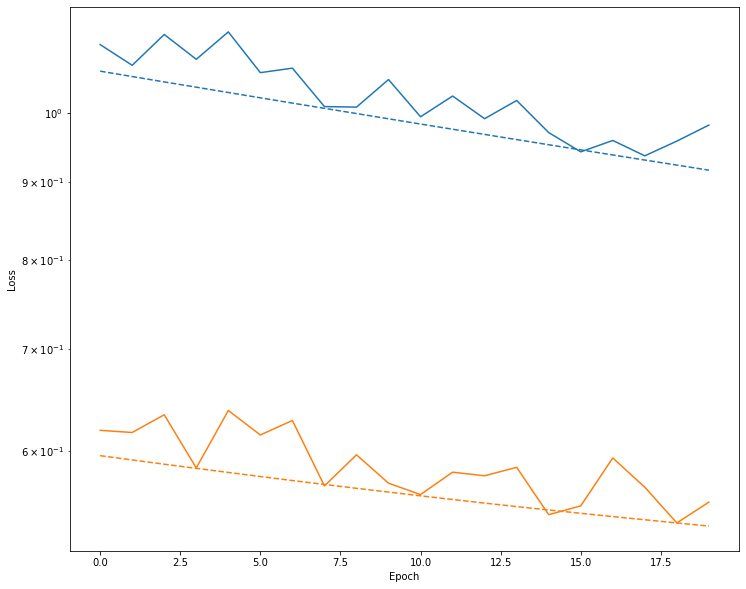

In [45]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')


plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [46]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6435 - tp: 27.0000 - fp: 109.0000 - tn: 463.0000 - fn: 91.0000 - accuracy: 0.7101 - precision: 0.1985 - recall: 0.2288 - auc: 0.5568 - val_loss: 0.5955 - val_tp: 2.0000 - val_fp: 22.0000 - val_tn: 92.0000 - val_fn: 22.0000 - val_accuracy: 0.6812 - val_precision: 0.0833 - val_recall: 0.0833 - val_auc: 0.4872
Epoch 2/100
1/1 [==============================] - 0s 70ms/step - loss: 0.6552 - tp: 20.0000 - fp: 87.0000 - tn: 371.0000 - fn: 74.0000 - accuracy: 0.7083 - precision: 0.1869 - recall: 0.2128 - auc: 0.5096 - val_loss: 0.5916 - val_tp: 2.0000 - val_fp: 22.0000 - val_tn: 92.0000 - val_fn: 22.0000 - val_accuracy: 0.6812 - val_precision: 0.0833 - val_recall: 0.0833 - val_auc: 0.4887
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 0.6805 - tp: 27.0000 - fp: 93.0000 - tn: 365.0000 - fn: 67.0000 - accuracy: 0.7101 - precision: 0.2250 - recall: 0.2872 - auc: 0.5246 - val_loss: 0.5878 - val_tp: 2.

In [47]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [52]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

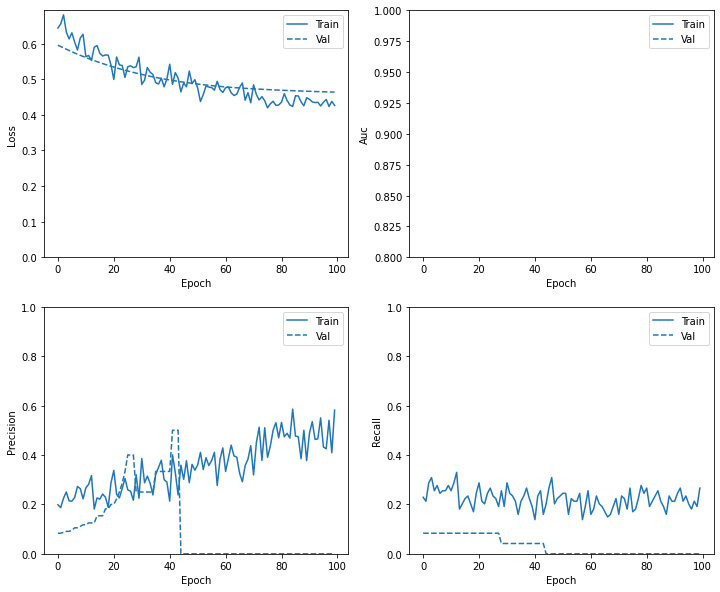

In [48]:
plot_metrics(baseline_history)

In [50]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.42824602127075195
tp :  4.0
fp :  6.0
tn :  137.0
fn :  26.0
accuracy :  0.8150289058685303
precision :  0.4000000059604645
recall :  0.13333334028720856
auc :  0.6976689696311951

Legitimate Transactions Detected (True Negatives):  137
Legitimate Transactions Incorrectly Detected (False Positives):  6
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  4
Total Fraudulent Transactions:  30


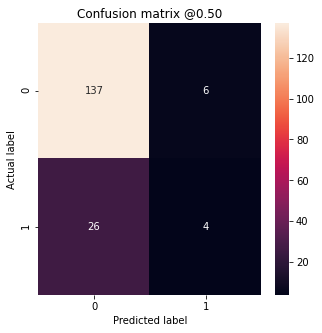

In [53]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [54]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

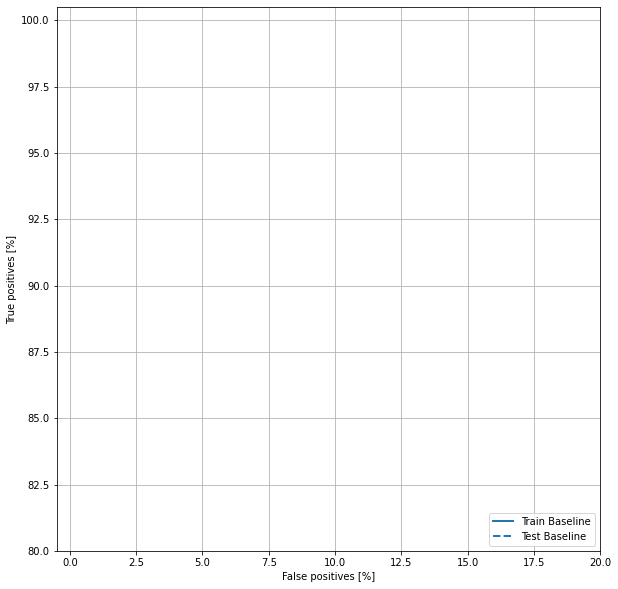

In [56]:
import sklearn
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [57]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight={0: .02, 1: 22}) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 4.6772 - tp: 36.0000 - fp: 85.0000 - tn: 516.0000 - fn: 88.0000 - accuracy: 0.7614 - precision: 0.2975 - recall: 0.2903 - auc: 0.6280 - val_loss: 0.6007 - val_tp: 2.0000 - val_fp: 22.0000 - val_tn: 92.0000 - val_fn: 22.0000 - val_accuracy: 0.6812 - val_precision: 0.0833 - val_recall: 0.0833 - val_auc: 0.4916
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 4.8245 - tp: 23.0000 - fp: 85.0000 - tn: 373.0000 - fn: 71.0000 - accuracy: 0.7174 - precision: 0.2130 - recall: 0.2447 - auc: 0.5563 - val_loss: 0.6016 - val_tp: 2.0000 - val_fp: 22.0000 - val_tn: 92.0000 - val_fn: 22.0000 - val_accuracy: 0.6812 - val_precision: 0.0833 - val_recall: 0.0833 - val_auc: 0.4918
Epoch 3/100
1/1 [==============================] - 0s 73ms/step - loss: 5.1911 - tp: 23.0000 - fp: 92.0000 - tn: 366.0000 - fn: 71.0000 - accuracy: 0.7047 - precision: 0.2000 - recall: 0.2447 - auc: 0.5439 - val_loss: 0.6027 - val_tp: 2.0

loss :  0.9196269512176514
tp :  24.0
fp :  71.0
tn :  72.0
fn :  6.0
accuracy :  0.5549132823944092
precision :  0.2526315748691559
recall :  0.800000011920929
auc :  0.7481352090835571

Legitimate Transactions Detected (True Negatives):  72
Legitimate Transactions Incorrectly Detected (False Positives):  71
Fraudulent Transactions Missed (False Negatives):  6
Fraudulent Transactions Detected (True Positives):  24
Total Fraudulent Transactions:  30


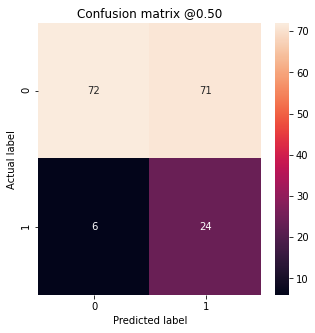

In [58]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

In [60]:
bool_train_labels = train_labels != 0
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

In [61]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(916, 24)

In [62]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [63]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [64]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8940 - tp: 771.0000 - fp: 815.0000 - tn: 391.0000 - fn: 244.0000 - accuracy: 0.5232 - precision: 0.4861 - recall: 0.7596 - auc: 0.5769 - val_loss: 1.0668 - val_tp: 19.0000 - val_fp: 89.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.3188 - val_precision: 0.1759 - val_recall: 0.7917 - val_auc: 0.4894
Epoch 2/100
1/1 [==============================] - 0s 92ms/step - loss: 0.8608 - tp: 783.0000 - fp: 684.0000 - tn: 329.0000 - fn: 252.0000 - accuracy: 0.5430 - precision: 0.5337 - recall: 0.7565 - auc: 0.5767 - val_loss: 1.0600 - val_tp: 19.0000 - val_fp: 89.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.3188 - val_precision: 0.1759 - val_recall: 0.7917 - val_auc: 0.4894
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 0.8558 - tp: 785.0000 - fp: 723.0000 - tn: 300.0000 - fn: 240.0000 - accuracy: 0.5298 - precision: 0.5206 - recall: 0.7659 - auc: 0.5664 - val_loss: 1.0532 - va

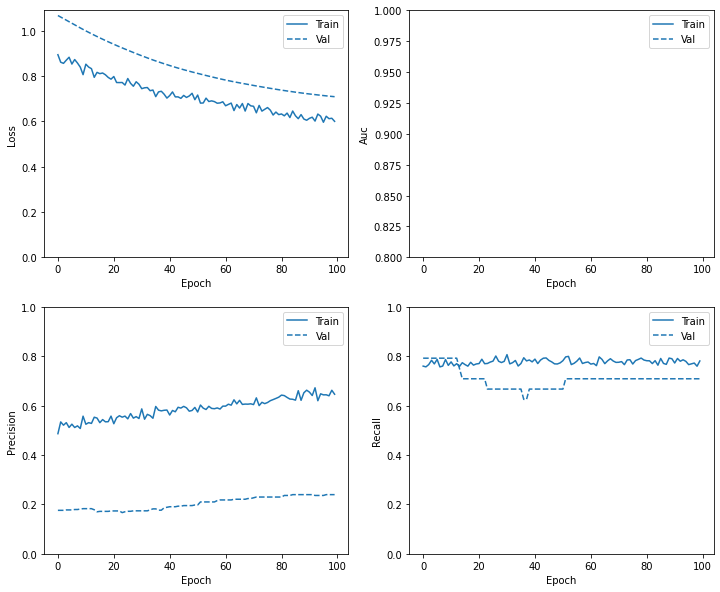

In [65]:
plot_metrics(resampled_history)

Epoch 1/1000
20/20 [==============================] - 4s 81ms/step - loss: 1.7724 - tp: 9042.1905 - fp: 8273.9524 - tn: 3109.1429 - fn: 2178.1905 - accuracy: 0.5350 - precision: 0.5195 - recall: 0.7987 - auc: 0.5811 - val_loss: 1.1712 - val_tp: 22.0000 - val_fp: 94.0000 - val_tn: 20.0000 - val_fn: 2.0000 - val_accuracy: 0.3043 - val_precision: 0.1897 - val_recall: 0.9167 - val_auc: 0.5561
Epoch 2/1000
20/20 [==============================] - 1s 29ms/step - loss: 1.4250 - tp: 9778.1429 - fp: 8635.0000 - tn: 2586.8571 - fn: 1430.4762 - accuracy: 0.5500 - precision: 0.5305 - recall: 0.8677 - auc: 0.6316 - val_loss: 1.2804 - val_tp: 22.0000 - val_fp: 100.0000 - val_tn: 14.0000 - val_fn: 2.0000 - val_accuracy: 0.2609 - val_precision: 0.1803 - val_recall: 0.9167 - val_auc: 0.5961
Epoch 3/1000
20/20 [==============================] - 1s 31ms/step - loss: 1.1922 - tp: 10200.9524 - fp: 9004.7619 - tn: 2255.4762 - fn: 969.2857 - accuracy: 0.5537 - precision: 0.5296 - recall: 0.9101 - auc: 0.6743

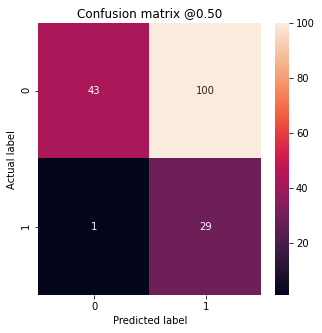

In [101]:
tf.random.set_seed(1234)
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds),
    class_weight={0:.5, 1:6.001} ##{0:.5, 1:6}{0:.4, 1:6}
    )

train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(np.array(X_test), batch_size=BATCH_SIZE)
valid_predictions_resampled = resampled_model.predict(np.array(X_val), batch_size=BATCH_SIZE)
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

Legitimate Transactions Detected (True Negatives):  24
Legitimate Transactions Incorrectly Detected (False Positives):  90
Fraudulent Transactions Missed (False Negatives):  2
Fraudulent Transactions Detected (True Positives):  22
Total Fraudulent Transactions:  24


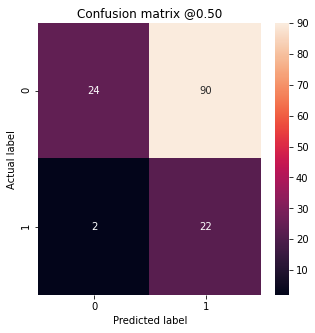

In [102]:
plot_cm(Y_val, valid_predictions_resampled)

In [91]:
test_matrix['Neural_net'] = test_predictions_resampled
valid_matrix['Neural_net'] = valid_predictions_resampled

Legitimate Transactions Detected (True Negatives):  52
Legitimate Transactions Incorrectly Detected (False Positives):  91
Fraudulent Transactions Missed (False Negatives):  3
Fraudulent Transactions Detected (True Positives):  27
Total Fraudulent Transactions:  30


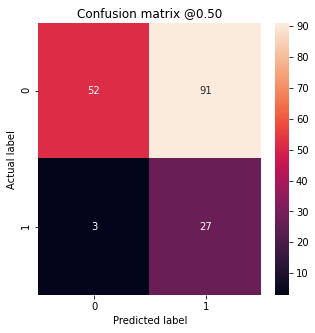

In [92]:
test_matrix['STACK'] = (test_matrix['Logistic'] + 
                        test_matrix['SVM'] +
                        test_matrix['CatBoost'] +
                        test_matrix['LGBM'] +
                        test_matrix['h2o_XGB'] +
                        test_matrix['h2o_GBM'] +
                        test_matrix['h2o_RF'] +
                        test_matrix['Neural_net'])
valid_matrix['STACK'] = (valid_matrix['Logistic'] + 
                        valid_matrix['SVM'] +
                        valid_matrix['CatBoost'] +
                        valid_matrix['LGBM'] +
                        valid_matrix['h2o_XGB'] +
                        valid_matrix['h2o_GBM'] +
                        valid_matrix['h2o_RF'] +
                        valid_matrix['Neural_net'])

test_matrix['STACK'] = test_matrix['STACK'].map(lambda 
                                                x: x + 1 - x 
                                                if x >= 2
                                                else 0)
valid_matrix['STACK'] = valid_matrix['STACK'].map(lambda 
                                                x: x + 1 - x 
                                                if x >= 2 
                                                else 0)
plot_cm(Y_test, test_matrix['STACK'])

Legitimate Transactions Detected (True Negatives):  40
Legitimate Transactions Incorrectly Detected (False Positives):  74
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  23
Total Fraudulent Transactions:  24


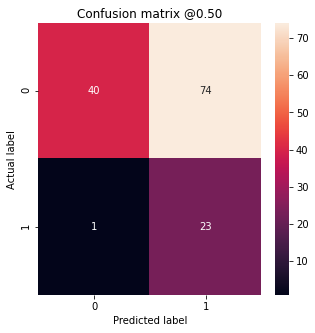

In [93]:
plot_cm(Y_val, valid_matrix['STACK'])